## The Data Set

The chosen data set is accessible [here](https://www-genesis.destatis.de/genesis//online?operation=table&code=46331-0001&bypass=true&levelindex=1&levelid=1714400794387#abreadcrumb). Titled "Empfang und Versand von Gütern (Seegüterumschlag deutscher Häfen): Deutschland, Jahre, Güterabteilungen und -gruppen" in German, its English translation is "Receipt and dispatch of goods (sea cargo handling in German ports): Germany, years, cargo divisions and groups". My data set spans a ten-year time period, chosen to have enough data to conduct meaningful analyses without introducing excessive complexity or data overload. In the rows, all the different kinds of goods are listed, while the columns represent the years. There are two columns per each year, one for import and the other for export of goods. The cell values are integers and their unit is tonnes. There is barely any missing data.

## Data Preparation

Load the required packages

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('..') # Make sure to be at project level

Load data by using function from utilities.py

In [3]:
from src.utilities import clean_and_format_data
df = clean_and_format_data('../data/preprocessed_data.csv')

Detected encoding: ISO-8859-1


In [4]:
df

2014            \
                                                      Import    Export   
Art des Gutes                                                            
Erzeugn. der Land- und Forstwirtschaft, Fischerei   13596048  10580213   
  Getreide                                           2840085   7744214   
  Kartoffeln                                           32705     35074   
  Zuckerrüben                                           3100        53   
  Anderes frisches Obst und Gemüse                   1513025    624525   
...                                                      ...       ...   
Gutart unbekannt                                    26972077  30441870   
  N.identifizierb.Güter i.Containern o.Wechselbeh.  14599403  14440489   
  Sonstige nicht identifizierbare Güter             12372674  16001381   
Sonstige Güter a.n.g.                                      0         0   
  Sonstige Güter, anderweitig nicht klassifiziert          0         0   

                                                        2015            \
                                                      Import    Export   
Art des Gutes                                                            
Erzeugn. der Land- und Forstwirtschaft, Fischerei   13796429  11708515   
  Getreide                                           2673603   9449983   
  Kartoffeln                                           75271     36680   
  Zuckerrüben                                           2825        47   
  Anderes frisches Obst und Gemüse                   1581029    515947   
...                                                      ...       ...   
Gutart unbekannt                                    25758433  29110690   
  N.identifizierb.Güter i.Containern o.Wechselbeh.  12669803  13189801   
  Sonstige nicht identifizierbare Güter             13088630  15920889   
Sonstige Güter a.n.g.                                      0         0   
  Sonstige Güter, anderweitig nicht klassifiziert          0         0   

                                                        2016            \
                                                      Import    Export   
Art des Gutes                                                            
Erzeugn. der Land- und Forstwirtschaft, Fischerei   12658966  10773867   
  Getreide                                           2233595   8484046   
  Kartoffeln                                           47625     33745   
  Zuckerrüben                                           3125         0   
  Anderes frisches Obst und Gemüse                   1381399    516338   
...                                                      ...       ...   
Gutart unbekannt                                    34785374  40556694   
  N.identifizierb.Güter i.Containern o.Wechselbeh.  21771408  27168300   
  Sonstige nicht identifizierbare Güter             13013966  13388394   
Sonstige Güter a.n.g.                                 178969     24875   
  Sonstige Güter, anderweitig nicht klassifiziert     178969     24875   

                                                        2017            \
                                                      Import    Export   
Art des Gutes                                                            
Erzeugn. der Land- und Forstwirtschaft, Fischerei   11923939   8615126   
  Getreide                                           1903822   6484472   
  Kartoffeln                                           55993     39867   
  Zuckerrüben                                           2798      6878   
  Anderes frisches Obst und Gemüse                   1360672    449866   
...                                                      ...       ...   
Gutart unbekannt                                    34227003  40109687   
  N.identifizierb.Güter i.Containern o.Wechselbeh.  20315518  25965793   
  Sonstige nicht identifizierbare Güter             13911485  14143894   
Sonstige Güter a.n.g.                                  53

Example of how to access cells in the multiindex data frame.

In [17]:
df[(2015, 'Import')]

Art des Gutes
Erzeugn. der Land- und Forstwirtschaft, Fischerei     13796429
  Getreide                                             2673603
  Kartoffeln                                             75271
  Zuckerrüben                                             2825
  Anderes frisches Obst und Gemüse                     1581029
                                                        ...   
Gutart unbekannt                                      25758433
  N.identifizierb.Güter i.Containern o.Wechselbeh.    12669803
  Sonstige nicht identifizierbare Güter               13088630
Sonstige Güter a.n.g.                                        -
  Sonstige Güter, anderweitig nicht klassifiziert            -
Name: (2015, Import), Length: 101, dtype: object

## Data Analysis

### Question 1: How have import and export volumes changes over the ten-year period?

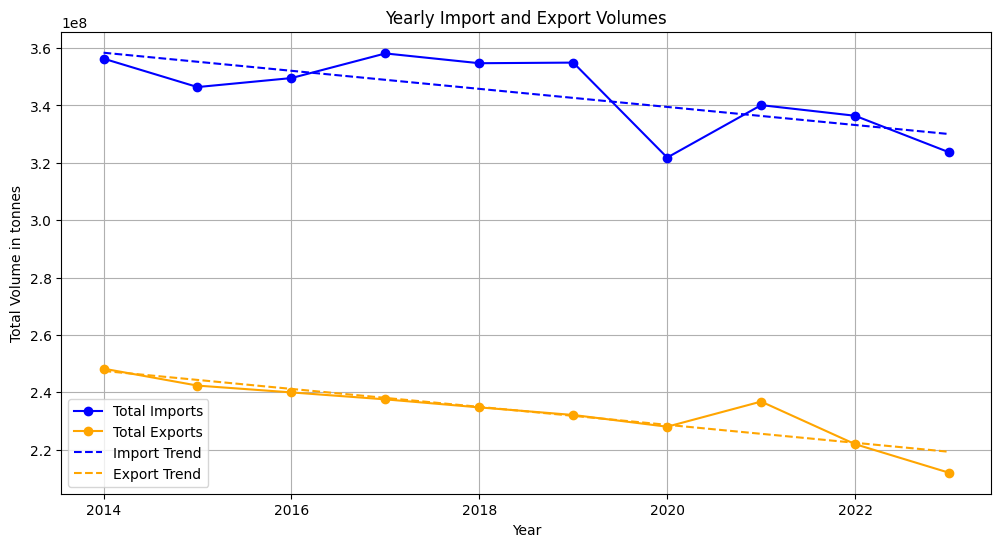

In [17]:
# Summing imports and exports across all goods for each year
yearly_imports = df.xs('Import', level=1, axis=1).sum()
yearly_exports = df.xs('Export', level=1, axis=1).sum()

years = np.arange(len(yearly_imports))  

# Add a linear regression 
import_slope, import_intercept = np.polyfit(years, yearly_imports, 1)
import_trend = import_intercept + import_slope * years
export_slope, export_intercept = np.polyfit(years, yearly_exports, 1)
export_trend = export_intercept + export_slope * years

# Plotting the 'original' data
plt.figure(figsize=(12, 6))
yearly_imports.plot(label='Total Imports', marker='o', color='blue')
yearly_exports.plot(label='Total Exports', marker='o', color='orange')

# Adding the trend lines
plt.plot(yearly_imports.index, import_trend, label='Import Trend', linestyle='--', color='blue')
plt.plot(yearly_exports.index, export_trend, label='Export Trend', linestyle='--', color='orange')

plt.title('Yearly Import and Export Volumes')
plt.xlabel('Year')
plt.ylabel('Total Volume in tonnes')
plt.legend()
plt.grid(True)
plt.show()

Can we identify some broader economic trends or shifts in trade patterns? -> Covid-19 2020

### Question 2: Which categories of goods are most frequently imported and exported?

In [19]:
# Summing across all years within import and export for each good
total_imports_by_good = df.xs('Import', level=1, axis=1).sum(axis=1).sort_values(ascending=False)
total_exports_by_good = df.xs('Export', level=1, axis=1).sum(axis=1).sort_values(ascending=False)

print("Top 7 Imported Goods:")
print(total_imports_by_good.head(7))
print("\nTop 7 Exported Goods:")
print(total_exports_by_good.head(7))

Top 7 Imported Goods:
Art des Gutes
Gutart unbekannt                                      353124880
Kohle, rohes Erdöl und Erdgas                         352319704
Erze, Steine und Erden, sonst. Bergbauerzeugnisse     279149334
  Erdöl                                               222285156
  N.identifizierb.Güter i.Containern o.Wechselbeh.    216536373
  Eisenerze                                           139357858
  Sonstige nicht identifizierbare Güter               136588506
dtype: int64

Top 7 Exported Goods:
Art des Gutes
Gutart unbekannt                                      401718767
  N.identifizierb.Güter i.Containern o.Wechselbeh.    251324893
  Sonstige nicht identifizierbare Güter               150393874
Chemische Erzeugnisse etc.                            140780957
Holzwaren, Papier, Pappe, Druckerzeugnisse            102923824
Nahrungs- und Genussmittel                             87011342
Erzeugn. der Land- und Forstwirtschaft, Fischerei      86876208
dtype: int64


Can we highlight specific resource availabilities?

### Question 3: Is there a correlation between the import and export volumes of certain goods?

In [10]:
# Compute correlation between imports and exports for each good
correlation_by_good = df.xs('Import', level=1, axis=1).corrwith(df.xs('Export', level=1, axis=1))

print("Correlation between Imports and Exports for each good:")
print(correlation_by_good.sort_values(ascending=False))

Correlation between Imports and Exports for each good:
2020    0.724336
2021    0.708275
2022    0.656259
2019    0.655809
2016    0.639886
2018    0.639650
2017    0.609383
2023    0.603878
2015    0.527086
2014    0.523105
dtype: float64


For example, does an increase in import of raw materials correlate with an increase in export of finished products?

### Question 4: How will this import/export continue in the future? Can we forecast some future trends in either cargo volume or which goods will be required most?

### Question 5: Can we see similar trends in the export of crops that need similar growing conditions and can we maybe link their export amount per year to certain climatic conditions during that time?

### Quesiton 6: Are technological, or in general processed, goods imported more rapidly/slower than agricultural products and how about the amounts each?


## Summary & Conclusion

## References

test